In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

D:\Python\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [22]:
# Load the dataset
df = pd.read_csv('MargedStarRating.csv')

In [24]:
# Display first few rows
# print("Head of dataset:")
print(df.head())

   Sum of 2021 Overall  Sum of 2022 Overall  Sum of 2023 Overall  \
0                  4.0                  4.5                  4.0   
1                  NaN                  NaN                  NaN   
2                  3.0                  3.5                  2.5   
3                  4.5                  5.0                  5.0   
4                  4.5                  5.0                  4.5   

  Contract Number  Sum of 2024 Overall  
0           H0028                  4.0  
1           H0074                  2.5  
2           H0111                  2.5  
3           H0154                  5.0  
4           H0169                  5.0  


In [26]:
# Rename the columns (example assumes first column is contract number)
df.columns = ['2021', '2022', '2023', 'ContractNumber', '2024']
df

,2021,2022,2023,ContractNumber,2024
0,4.0,4.5,4.0,H0028,4.0
1,NaN,NaN,NaN,H0074,2.5
2,3.0,3.5,2.5,H0111,2.5
3,4.5,5.0,5.0,H0154,5.0
4,4.5,5.0,4.5,H0169,5.0
...,...,...,...,...,...
297,3.5,4.0,3.5,R0759,3.5
298,3.5,4.0,4.0,R2604,4.0
299,3.5,3.5,3.5,R3175,3.0
300,3.5,4.0,3.5,R3444,3.5


In [27]:
# Convert 'ContractNumber' to string
df['ContractNumber'] = df['ContractNumber'].astype(str)

In [28]:
# Convert columns to numeric, treat non-numeric as NaN
for year in ['2021', '2022', '2023', '2024']:
    df[year] = pd.to_numeric(df[year], errors='coerce')

In [29]:
# Drop rows with NA values in any year column
df = df.dropna(subset=['2021', '2022', '2023', '2024'])

In [30]:
# Define features and target
X = df[['2021', '2022', '2023', '2024']]
y = df[['2024']].values.ravel()  # Predicting based on trends till 2024

In [31]:
# Split data for training and testing (simulate training using 2021-2023, test on 2024)
X_train = df[['2021', '2022', '2023']]
y_train = df['2024']

In [32]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# # Predict 2025 using 2022, 2023, 2024
X_pred = df[['2021','2022', '2023']]
df['2025_Predicted'] = model.predict(X_pred)


<ipython-input-38-b1f38220ad4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2025_Predicted'] = model.predict(X_pred)


In [39]:
# Show some predictions
print("\nSample predictions:")
print(df[['ContractNumber', '2024', '2025_Predicted']].head(10))


Sample predictions:
   ContractNumber  2024  2025_Predicted
0           H0028   4.0        3.971801
2           H0111   2.5        2.989693
3           H0154   5.0        4.772729
4           H0169   5.0        4.316665
5           H0174   3.0        2.831596
6           H0251   4.0        4.257517
9           H0294   3.5        4.316665
10          H0321   3.5        3.586075
11          H0351   3.0        2.995940
12          H0354   4.0        3.971801


In [40]:

# Evaluation (how well model fits to past data)
y_test = df['2024']
y_pred = model.predict(X_train)

In [41]:
print("\nModel Evaluation (on 2024 prediction):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation (on 2024 prediction):
MSE: 0.12868922872750044
R2 Score: 0.6971382037042702


In [42]:
# Save results to CSV
df.to_csv("StarRating_with_2025_Predictions.csv", index=False)

In [44]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Save results to Excel
output_file = 'StarRating_with_2025_Predictions.xlsx'
df.to_excel(output_file, index=False)


<ipython-input-45-4f6c6f50706d>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.2.9' currently installed).
  df.to_excel(output_file, index=False)


In [46]:
# ----------------------------
#  Visualizations
# ---------------------------

In [47]:
# 1. Line plot of average ratings over time
df_melt = df.melt(id_vars='ContractNumber', value_vars=['2021', '2022', '2023', '2024', '2025_Predicted'],
                  var_name='Year', value_name='StarRating')

<ipython-input-48-7bbdb7643d60>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_melt, x='Year', y='StarRating', estimator='mean', ci=None, marker='o')


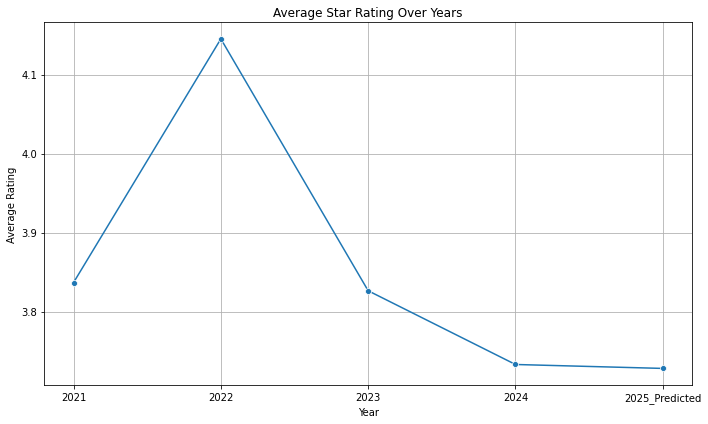

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melt, x='Year', y='StarRating', estimator='mean', ci=None, marker='o')
plt.title('Average Star Rating Over Years')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

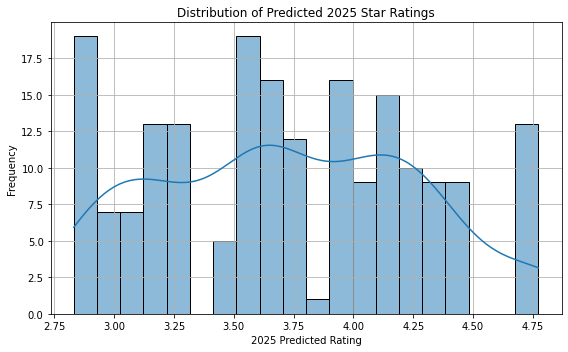

In [49]:
# 2. Distribution of 2025 Predicted Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['2025_Predicted'], bins=20, kde=True)
plt.title('Distribution of Predicted 2025 Star Ratings')
plt.xlabel('2025 Predicted Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

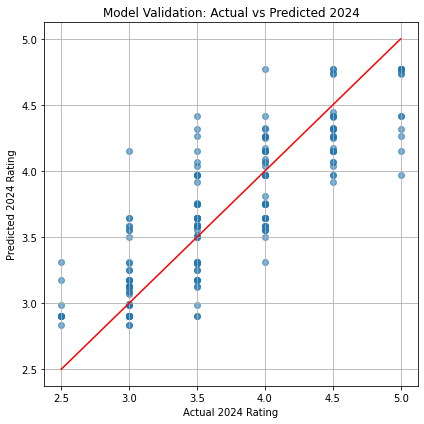

In [50]:
# 3. Actual vs Predicted 2024 (model check)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual 2024 Rating")
plt.ylabel("Predicted 2024 Rating")
plt.title("Model Validation: Actual vs Predicted 2024")
plt.grid(True)
plt.tight_layout()
plt.show()